In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data = pd.read_excel('Data Project Original.xlsx')
data

,Pressure\npsi,PB\npsi,RSI\nscf/bbl,Bo\nv/v,Temp\ndeg.F,SG\nOil,GOR\nscf/bbl,Gas\nSG
0,3287,3285,377,1.150,154,0.84,356,0.65
1,3421,3415,401,1.163,159,0.83,378,0.65
2,3515,3515,407,1.161,161,0.83,378,0.59
3,3513,3491,474,1.183,161,0.82,450,0.65
4,3536,3516,540,1.200,163,0.81,515,0.65
...,...,...,...,...,...,...,...,...
527,2260,2216,282,1.136,154,0.82,282,0.61
528,2260,2169,282,1.146,146,0.91,282,0.61
529,2260,2169,282,1.146,146,0.91,282,0.61
530,2260,2169,282,1.146,150,0.91,282,0.61


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pressure
psi  532 non-null    int64  
 1   PB
psi        532 non-null    int64  
 2   RSI
scf/bbl   532 non-null    int64  
 3   Bo
v/v        532 non-null    float64
 4   Temp
deg.F    532 non-null    int64  
 5   SG
Oil        532 non-null    float64
 6   GOR
scf/bbl   532 non-null    int64  
 7   Gas
SG        532 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 33.4 KB


In [4]:
data.head(6)

,Pressure\npsi,PB\npsi,RSI\nscf/bbl,Bo\nv/v,Temp\ndeg.F,SG\nOil,GOR\nscf/bbl,Gas\nSG
0,3287,3285,377,1.150,154,0.84,356,0.65
1,3421,3415,401,1.163,159,0.83,378,0.65
2,3515,3515,407,1.161,161,0.83,378,0.59
3,3513,3491,474,1.183,161,0.82,450,0.65
4,3536,3516,540,1.200,163,0.81,515,0.65
5,3627,3615,525,1.197,162,0.80,500,0.65


In [5]:
data.columns

Index(['Pressure\npsi', 'PB\npsi', 'RSI\nscf/bbl', 'Bo\nv/v', 'Temp\ndeg.F',
       'SG\nOil', 'GOR\nscf/bbl', 'Gas\nSG'],
      dtype='object')

In [6]:
data.drop(columns=['Pressure\npsi','PB\npsi','GOR\nscf/bbl'],inplace= True)

In [7]:
data.rename(columns={'RSI\nscf/bbl':'RSI', 'Bo\nv/v': 'BO', 'Temp\ndeg.F': 'Temp_F',
                   'Gas\nSG': 'SG_Gas', 'SG\nOil': 'SG_Oil'}, inplace=True)

In [8]:
data['Oil_API']= 141.5/data['SG_Oil']- 131.5

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RSI      532 non-null    int64  
 1   BO       532 non-null    float64
 2   Temp_F   532 non-null    int64  
 3   SG_Oil   532 non-null    float64
 4   SG_Gas   532 non-null    float64
 5   Oil_API  532 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 25.1 KB


In [10]:
data.describe()

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,726.234962,1.361036,167.103383,0.730508,0.644568,69.029094
std,535.309045,0.324735,27.927041,0.119201,0.044506,46.021145
min,14.000000,0.402000,69.000000,0.200000,0.330000,3.261905
25%,340.000000,1.149000,147.000000,0.650000,0.650000,38.981928
50%,555.500000,1.271000,162.000000,0.740000,0.650000,59.716216
75%,991.250000,1.517750,181.000000,0.830000,0.650000,86.192308
max,4156.000000,3.730000,275.000000,1.050000,0.900000,576.000000


In [11]:
df = data[(data['Oil_API']>=10) & (data['Oil_API']<=70)]
df

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API
0,377,1.150,154,0.84,0.65,36.952381
1,401,1.163,159,0.83,0.65,38.981928
2,407,1.161,161,0.83,0.59,38.981928
3,474,1.183,161,0.82,0.65,41.060976
4,540,1.200,163,0.81,0.65,43.191358
...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976
528,282,1.146,146,0.91,0.61,23.994505
529,282,1.146,146,0.91,0.61,23.994505
530,282,1.146,150,0.91,0.61,23.994505


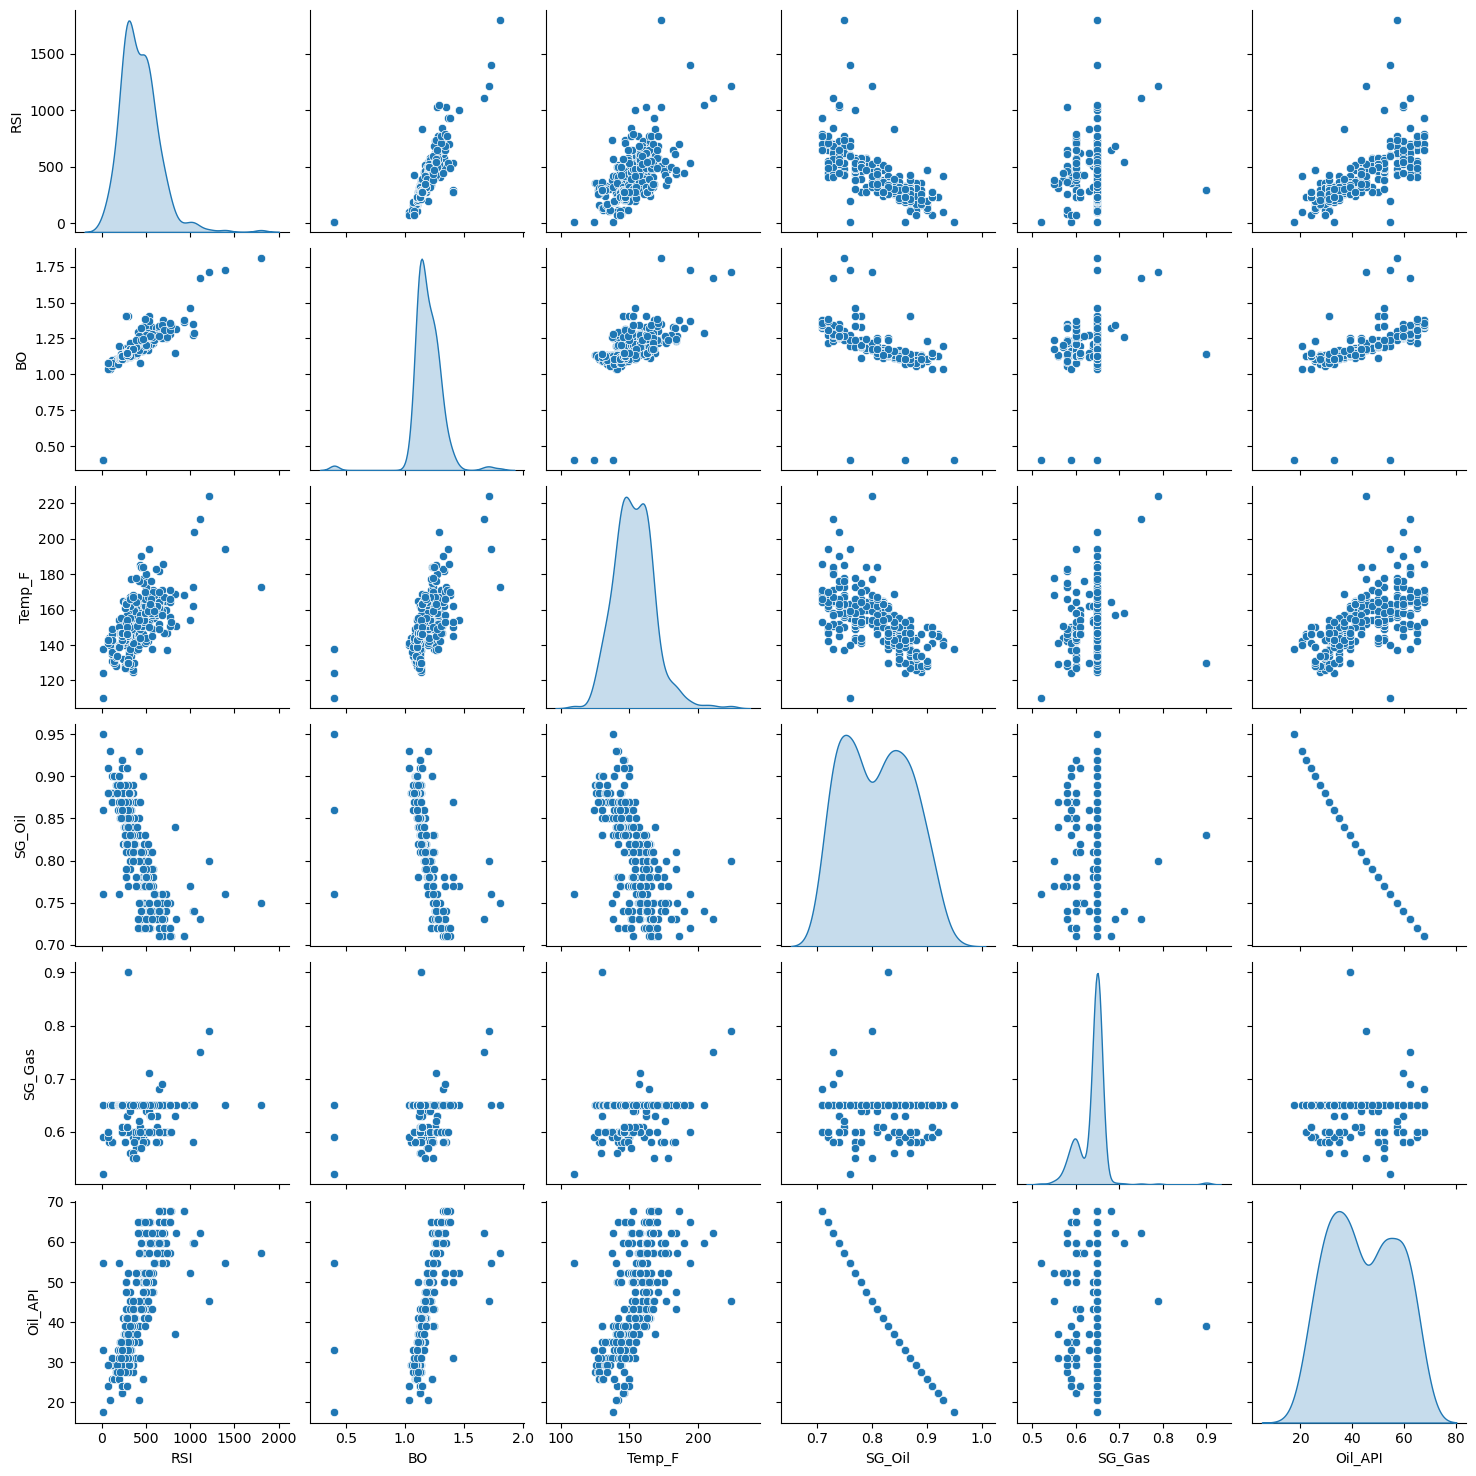

In [12]:
sns.pairplot(data=df, diag_kind='kde')

### Data Splitting

#### Splitting the data into train and test sets 

In [13]:
y = df['BO']
X = df.copy()
#np.log10(y_train)

df1, df2, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state= 100)

In [14]:
print(100*df1.shape[0]/df.shape[0])
print(100*df2.shape[0]/df.shape[0])

69.7452229299363
30.254777070063696


In [15]:
df3 = df1.copy()
df3['M'] = df3['Temp_F']*(df3['SG_Oil']/df3['SG_Gas'])

In [16]:
df3.head()

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,M
244,74,1.037,141,0.91,0.59,23.994505,217.474576
473,197,1.104,139,0.90,0.65,25.722222,192.461538
298,555,1.271,162,0.74,0.63,59.716216,190.285714
130,455,1.207,166,0.78,0.65,49.910256,199.200000
61,245,1.130,132,0.88,0.65,29.295455,178.707692


In [17]:
def mape(y_true, y_pred):
    """This function calculates the percent mean absolute relative error"""
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

def mpe(y_true, y_pred):
    """This function calculates the percent mean relative error"""
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(((y_true - y_pred) / y_true) * 100)

In [18]:
Bo_train = df3['BO']
M = df3['M']
RSI = df3['RSI']

In [19]:
#modell = df3.copy()

In [20]:
#modell.drop(['Temp_F', 'SG_Gas', 'SG_Oil','Oil_API'], axis=1, inplace = True)

In [21]:
df3.drop(['Temp_F', 'SG_Gas', 'SG_Oil','Oil_API'], axis=1, inplace = True)

In [22]:
#modell.head()

In [23]:
df3.head()

,RSI,BO,M
244,74,1.037,217.474576
473,197,1.104,192.461538
298,555,1.271,190.285714
130,455,1.207,199.200000
61,245,1.130,178.707692


Converting to log form to express as a linear function

Log Bo = Log a + b(Log Rs) + c(Log M) 

Y = Bo + B1X1 + B2X2 + B3X3

In [24]:
#modell.drop('BO', axis=1, inplace=True)

In [25]:
#modell['RSI'] = np.log10(modell['RSI'])
#modell['M'] = np.log10(modell['M'])

In [26]:
#df3['BO'] = np.log10(df3['BO'])
df3['RSI'] = np.log10(df3['RSI'])
df3['M'] = np.log10(df3['M'])

#### Creating a validation set to evaluate properties of the machine learning model

In [27]:
y = df3['BO']
X = df3.drop('BO', axis=1)

X_train, X_val, y_tr, y_vl = train_test_split(X,np.log10(y_train), test_size=0.15, random_state=100) 

### Machine Learning Modelling

In [28]:
lr_reg = LinearRegression()
rg_reg = Ridge(alpha=10.0,random_state= 42)
las_reg = Lasso(alpha=10.0, random_state=42)

In [29]:
reg = {
    "LinearRegression": lr_reg,
    "Ridge": rg_reg,
    "Lasso": las_reg,
    }

In [30]:
#print(100*X_train.shape[0])
#print(100* X_val.shape[0])

In [31]:
%%time
dic_train_rmse =  {"Model":[],"RMSE_Train":[]}
dic_val_rmse =  {"Model":[],"RMSE_Val":[]}
dic_train_mae =  {"Model":[],"MAE_Train":[]}
dic_val_mae =  {"Model":[],"MAE_Val":[]}
for name, model in reg.items():
    
    model.fit(X_train, y_tr)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    rmse_train  = np.sqrt(mean_squared_error(y_tr, y_train_pred))
    rmse_val  = np.sqrt(mean_squared_error(y_vl, y_val_pred))
    mae_train = mean_absolute_error(y_tr, y_train_pred)
    mae_val = mean_absolute_error(y_vl, y_val_pred)
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("\n-----Training Data Evalution-----")
    
    print("RMSE_TRAIN: ",np.sqrt(mean_squared_error(y_tr, y_train_pred)))
    print("\nMAE_TRAIN: ", mean_absolute_error(y_tr, y_train_pred))
    print("\nRMSE_VAL: ",np.sqrt(mean_squared_error(y_vl, y_val_pred)))
    print("\nMAE_VAL: ", mean_absolute_error(y_vl, y_val_pred))
   
    dic_train_rmse["Model"].append(name)
    dic_val_rmse["Model"].append(name)
    dic_train_mae["Model"].append(name)
    dic_val_mae["Model"].append(name)
    dic_train_rmse["RMSE_Train"].append(rmse_train)
    dic_val_rmse["RMSE_Val"].append(rmse_val)
    dic_train_mae["MAE_Train"].append(mae_train)
    dic_val_mae["MAE_Val"].append(mae_val)
final_data_T_rmse = pd.DataFrame(dic_train_rmse)
final_data_V_rmse = pd.DataFrame(dic_val_rmse)
final_data_T_mae = pd.DataFrame(dic_train_mae)
final_data_V_mae = pd.DataFrame(dic_val_mae)
print("==================================================================")
print("==================================================================")
print("==================================================================")
print(final_data_T_rmse.sort_values("RMSE_Train", axis = 0, ascending = True))
print(final_data_V_rmse.sort_values("RMSE_Val", axis = 0, ascending = True))
print(final_data_T_mae.sort_values("MAE_Train", axis = 0, ascending = True))
print(final_data_V_mae.sort_values("MAE_Val", axis = 0, ascending = True))

--------------------------------------------------------------
Model: LinearRegression

-----Training Data Evalution-----
RMSE_TRAIN:  0.030368691165167837

MAE_TRAIN:  0.017963042246107203

RMSE_VAL:  0.03196960193383214

MAE_VAL:  0.02162253981477594
--------------------------------------------------------------
Model: Ridge

-----Training Data Evalution-----
RMSE_TRAIN:  0.03786275296613644

MAE_TRAIN:  0.015511007875333847

RMSE_VAL:  0.020013732843261505

MAE_VAL:  0.012175489347058761
--------------------------------------------------------------
Model: Lasso

-----Training Data Evalution-----
RMSE_TRAIN:  0.05990075131845152

MAE_TRAIN:  0.030849693286398076

RMSE_VAL:  0.02663844729741425

MAE_VAL:  0.02213724498184639
              Model  RMSE_Train
0  LinearRegression    0.030369
1             Ridge    0.037863
2             Lasso    0.059901
              Model  RMSE_Val
1             Ridge  0.020014
2             Lasso  0.026638
0  LinearRegression  0.031970
              M

#### Linear regression performed better

In [32]:
lr_reg.fit(X_train, y_tr)
lr_reg.intercept_, lr_reg.coef_

(-0.6257996518300781, array([0.1951273 , 0.08652585]))

#### Lasso regression 

In [33]:
las_reg.fit(X_train, y_tr)
las_reg.intercept_, las_reg.coef_

(0.07301845571970661, array([0., 0.]))

#### Ridge

In [34]:
rg_reg.fit(X_train, y_tr)
rg_reg.intercept_, rg_reg.coef_

(-0.21383918427276272, array([0.11012189, 0.0017673 ]))

In [35]:
a = 10**-0.6257996518300781
a

0.23670113922975738

### Correlation Developed:

In [36]:
pred_p = a*(RSI**0.1951273)*(M**0.08652585)

In [37]:
#Finding the rmse and mae by comparing the target value gotten

print("The rmse value is: ", np.sqrt(mean_squared_error(y, pred_p)))
print("\nThe percent mean absolute  error is: ", mape(y, pred_p))
print("\nThe percent mean error is: ", mpe(y, pred_p))

The rmse value is:  0.070324592307055

The percent mean absolute  error is:  4.3037217327967205

The percent mean error is:  -0.21357874456551337


In [38]:
data.columns

Index(['RSI', 'BO', 'Temp_F', 'SG_Oil', 'SG_Gas', 'Oil_API'], dtype='object')

### Comparing the performance with existing correlations

In [39]:
def Standing_Corr(data):
    """
    This function simulates oil formation volume factor using Standing correlation
    """
    
    A = (data['RSI']*(data['SG_Gas']/data['SG_Oil']**0.5))
    B = 1.25 * data['Temp_F']
    C= (A+B)**1.175
    data['Bo_Standings'] = 0.972 + (0.0001472 * C)
    
    return data

#def Vasquez_Beggs_Corr(data):
    """
    This function simulates oil formation volume factor using Vasquez_Beggs correlation
    """
    #M = (data['Oil_API']/data['SG_Gas'])*data['Temp_F']
    #data['Vasquez_Beggs'] = 1 + 
    
    
    
def Petrosky_Farshad_Corr(data):
    """
    This function simulates oil formation volume factor using Petrosky_Farshad correlation
    """
    A = ((data['RSI']**0.3738)*(data['SG_Gas']**0.2914/data['SG_Oil']**0.6265))
    B = 0.24626*(data['Temp_F']**0.5731)
    C = (A+B)
    D = C**3.0936 
    data['Petrosky_Farshad'] = 1.0113 + (0.000072046 * D)
    
    return data


def Almehaideb_Corr(data, a1=1.122018, a2 = 0.00000141):
    L = a2 * data['RSI']* data['Temp_F']
    M = data['SG_Oil']**2
    data['Almehaideb'] = a1 + (L/M)
    
    return data

def Al_Marhoun_Corr(data, a1 = 0.00177342, a2= 0.00220163, a3 = 0.000004292580, a4= 0.00528707):
    """This function simulates oil formation volume factor using Almehaideb correlation"""
    
    C = (1 - data['SG_Oil'])
    d = data['SG_Gas']/data['SG_Oil']
    data['Al_Marhoun'] = 1 + (a1*data['RSI'])+ (a2*data['RSI']*d) + (a3*data['RSI']*C*data['Temp_F']) + (a4*data['Temp_F'])
    
    return data
#Bo = 1+10[a1+ a2 (log G) – a3 (log G)2]
#G = Rs( γg /γ )a4 + a5 T

def Glaso_corr(data, a1= -6.58511, a2 = 2.91329, a3 = 0.27683, a4 = 0.526, a5 = 0.968):
    """This function simulates oil formation volume factor using Glaso correlation"""
    y = (data['SG_Gas']/data['SG_Oil'])**a4
    y1 = a5 * data['Temp_F']
    G = (data['RSI']*y) + y1
    l1 = a2*np.log10(G)
    l2 = a3*(np.log10(G)**2)
    l3 = np.exp(a1+l1-l2)
    data['Glaso'] = 1 + l3
    
    return data


def Fattah_Corr(data, a1 = 1.7768294, a2 = 0.000560993, a3 = 0.0000122421):
    """This function simulates oil formation volume factor using Almehaideb correlation"""
    rs = data['RSI']**a2
    M = data['Temp_F']*(data['SG_Oil']/data['SG_Gas'])
    Mt = M ** a3
    
    data['Fattah'] = a1 * rs * Mt
    
    return data

def Linear_Regr_Corr(data, a1=0.21720617077071544,a2=0.16532621,  a3=0.1359519):
    """This function simulates oil formation volume factor using Linear_Regr correlation"""
    rs= data['RSI']**a2
    M = data['Temp_F']*(data['SG_Oil']/data['SG_Gas'])
    Mt = M ** a3
    data['Linear_Regr'] = a1 * rs * Mt
    
    return data
    
def Lasso_Corr(data, a1=10**0.07301845571970661, a2=0., a3=0.):
    """This function simulates oil formation volume factor using Lasso correlation"""
    rs= data['RSI']**a2
    M = data['Temp_F']*(data['SG_Oil']/data['SG_Gas'])
    Mt = M ** a3
    data['Lasso'] = a1 * rs * Mt
    
    return data

def Ridge_Corr(data, a1=10**-0.21383918427276272, a2=0.11012189, a3=0.0017673):
    """This function simulates oil formation volume factor using Ridge correlation"""
    
    rs= data['RSI']**a2
    M = data['Temp_F']*(data['SG_Oil']/data['SG_Gas'])
    Mt = M ** a3
    data['Ridge'] = a1 * rs * Mt
    
    return data

### Comparison among models

In [40]:
model = df.copy()
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API
0,377,1.150,154,0.84,0.65,36.952381
1,401,1.163,159,0.83,0.65,38.981928
2,407,1.161,161,0.83,0.59,38.981928
3,474,1.183,161,0.82,0.65,41.060976
4,540,1.200,163,0.81,0.65,43.191358
...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976
528,282,1.146,146,0.91,0.61,23.994505
529,282,1.146,146,0.91,0.61,23.994505
530,282,1.146,150,0.91,0.61,23.994505


In [41]:
model = Standing_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings
0,377,1.150,154,0.84,0.65,36.952381,1.169927
1,401,1.163,159,0.83,0.65,38.981928,1.182619
2,407,1.161,161,0.83,0.59,38.981928,1.172436
3,474,1.183,161,0.82,0.65,41.060976,1.211815
4,540,1.200,163,0.81,0.65,43.191358,1.239234
...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387
528,282,1.146,146,0.91,0.61,23.994505,1.121814
529,282,1.146,146,0.91,0.61,23.994505,1.121814
530,282,1.146,150,0.91,0.61,23.994505,1.124243


In [42]:
model = Petrosky_Farshad_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420
...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127


In [43]:
model = Almehaideb_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178
...,...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325,1.213085
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127,1.194042


In [44]:
model = Al_Marhoun_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb,Al_Marhoun
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035,3.164936
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516,3.289704
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135,3.257779
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046,3.578007
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178,3.845267
...,...,...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325,1.213085,2.809728
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127,1.194042,2.725687


In [45]:
model = Glaso_corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb,Al_Marhoun,Glaso
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035,3.164936,1.464886
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516,3.289704,1.481526
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135,3.257779,1.475315
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046,3.578007,1.520308
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178,3.845267,1.553785
...,...,...,...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325,1.213085,2.809728,1.408851
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127,1.194042,2.725687,1.397469


In [46]:
model = Fattah_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb,Al_Marhoun,Glaso,Fattah
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035,3.164936,1.464886,1.782868
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516,3.289704,1.481526,1.782930
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135,3.257779,1.475315,1.782947
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046,3.578007,1.520308,1.783097
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178,3.845267,1.553785,1.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325,1.213085,2.809728,1.408851,1.782578
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127,1.194042,2.725687,1.397469,1.782580


In [47]:
model = Linear_Regr_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb,Al_Marhoun,Glaso,Fattah,Linear_Regr
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035,3.164936,1.464886,1.782868,1.189452
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516,3.289704,1.481526,1.782930,1.204918
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135,3.257779,1.475315,1.782947,1.225971
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046,3.578007,1.520308,1.783097,1.238763
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178,3.845267,1.553785,1.783228,1.265764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325,1.213085,2.809728,1.408851,1.782578,1.139798
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580,1.147696
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580,1.147696
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127,1.194042,2.725687,1.397469,1.782580,1.151921


In [48]:
model = Lasso_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb,Al_Marhoun,Glaso,Fattah,Linear_Regr,Lasso
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035,3.164936,1.464886,1.782868,1.189452,1.183092
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516,3.289704,1.481526,1.782930,1.204918,1.183092
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135,3.257779,1.475315,1.782947,1.225971,1.183092
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046,3.578007,1.520308,1.783097,1.238763,1.183092
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178,3.845267,1.553785,1.783228,1.265764,1.183092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325,1.213085,2.809728,1.408851,1.782578,1.139798,1.183092
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580,1.147696,1.183092
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580,1.147696,1.183092
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127,1.194042,2.725687,1.397469,1.782580,1.151921,1.183092


In [49]:
model = Ridge_Corr(model)
model

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb,Al_Marhoun,Glaso,Fattah,Linear_Regr,Lasso,Ridge
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035,3.164936,1.464886,1.782868,1.189452,1.183092,1.185592
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516,3.289704,1.481526,1.782930,1.204918,1.183092,1.193719
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135,3.257779,1.475315,1.782947,1.225971,1.183092,1.195904
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046,3.578007,1.520308,1.783097,1.238763,1.183092,1.215909
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178,3.845267,1.553785,1.783228,1.265764,1.183092,1.233490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,282,1.136,154,0.82,0.61,41.060976,1.131387,1.189325,1.213085,2.809728,1.408851,1.782578,1.139798,1.183092,1.148365
528,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580,1.147696,1.183092,1.148468
529,282,1.146,146,0.91,0.61,23.994505,1.121814,1.162473,1.192121,2.704103,1.394798,1.782580,1.147696,1.183092,1.148468
530,282,1.146,150,0.91,0.61,23.994505,1.124243,1.165127,1.194042,2.725687,1.397469,1.782580,1.151921,1.183092,1.148523


In [50]:
model = df.copy()
model = Standing_Corr(model)
model = Petrosky_Farshad_Corr(model)
model = Almehaideb_Corr(model)
model = Al_Marhoun_Corr(model)
model = Fattah_Corr(model)
model = Glaso_corr(model)
model = Linear_Regr_Corr(model)
model = Lasso_Corr(model)
model = Ridge_Corr(model)
model.head()

,RSI,BO,Temp_F,SG_Oil,SG_Gas,Oil_API,Bo_Standings,Petrosky_Farshad,Almehaideb,Al_Marhoun,Fattah,Glaso,Linear_Regr,Lasso,Ridge
0,377,1.150,154,0.84,0.65,36.952381,1.169927,1.234977,1.238035,3.164936,1.782868,1.464886,1.189452,1.183092,1.185592
1,401,1.163,159,0.83,0.65,38.981928,1.182619,1.254135,1.252516,3.289704,1.782930,1.481526,1.204918,1.183092,1.193719
2,407,1.161,161,0.83,0.59,38.981928,1.172436,1.244665,1.256135,3.257779,1.782947,1.475315,1.225971,1.183092,1.195904
3,474,1.183,161,0.82,0.65,41.060976,1.211815,1.294798,1.282046,3.578007,1.783097,1.520308,1.238763,1.183092,1.215909
4,540,1.200,163,0.81,0.65,43.191358,1.239234,1.333420,1.311178,3.845267,1.783228,1.553785,1.265764,1.183092,1.233490


In [51]:
model.columns

Index(['RSI', 'BO', 'Temp_F', 'SG_Oil', 'SG_Gas', 'Oil_API', 'Bo_Standings',
       'Petrosky_Farshad', 'Almehaideb', 'Al_Marhoun', 'Fattah', 'Glaso',
       'Linear_Regr', 'Lasso', 'Ridge'],
      dtype='object')

In [63]:
def performance(df):
    """
        RMSE: Root Mean Squared Error
        MARE: Mean Absolute Relative Error (in percentage)
        MRE: Mean Relative Error
    """
    
    RMSE = []
    MARE = []
    MRE = []
    R2 = []
    std_dev = []
    
    for corr in df.columns[6:]:
        print(f"\n_____________{corr}__________")
        measured, estimated = df[df.columns[1]], df[corr]
        
        # Calculate RMSE
        rmse_score = np.sqrt(mean_squared_error(measured, estimated))
        
        # Calculate MARE
        relative_errors = (measured - estimated) / measured * 100
        mare_score = np.mean(np.abs(relative_errors))
        
        # Calculate MRE
        relative_errors = measured - estimated
        mre_score = np.mean(np.abs(relative_errors))
        
        # Calculate R2 score
        r2 = r2_score(measured, estimated)
        
        # Calculate standard deviation
        residuals = measured - estimated
        stdev = np.std(residuals)
        
        print("\nThe RMSE value is:", rmse_score)
        print("\nThe mean absolute relative error is:", mare_score)
        print("\nThe mean relative error is:", mre_score)
        print("\nThe R2 score is:", r2)
        print("\nThe standard deviation is:", stdev)
        
        RMSE.append(rmse_score)
        MARE.append(mare_score)
        MRE.append(mre_score)
        R2.append(r2)
        std_dev.append(stdev)
        
    return RMSE, MARE, MRE, R2, std_dev

#RMSE, MARE, MRE, R2, std_dev = performance(model)


In [64]:
RMSE, MARE, MRE, R2, stv_dev = performance(model)


_____________Bo_Standings__________

The RMSE value is: 0.07778127126623319

The mean absolute relative error is: 3.668564519854531

The mean relative error is: 0.0332043969286592

The R2 score is: 0.6220245702541207

The standard deviation is: 0.0777792741650799

_____________Petrosky_Farshad__________

The RMSE value is: 0.1222058753581094

The mean absolute relative error is: 8.433656993749839

The mean relative error is: 0.09164131948234806

The R2 score is: 0.06696557455657903

The standard deviation is: 0.08753672474433839

_____________Almehaideb__________

The RMSE value is: 0.11682457887887078

The mean absolute relative error is: 8.687678379744494

The mean relative error is: 0.09088474418361865

The R2 score is: 0.14732811403246693

The standard deviation is: 0.08047208420247925

_____________Al_Marhoun__________

The RMSE value is: 2.3659981710760563

The mean absolute relative error is: 183.0651685387383

The mean relative error is: 2.215602373534904

The R2 score is: -34

In [65]:
index = ['Standing', 'Petrosky_Farshad', 'Almehaideb','Al-Marhoun', 'Fattah','Glaso', 'Linear_Regression', 'Lasso', 'Ridge']

Bo_data = pd.DataFrame({'RMSE': RMSE, 'MARE': MARE, 'MRE': MRE, 'R2': R2, 'stv_dev': stv_dev}, index=index)
Bo_data = Bo_data.sort_values(by='MARE')  # Sort by MARE in ascending order
#Bo_data = Bo_data.reset_index()  # Reset the index

# Set the display format to decimal with four decimal places
pd.options.display.float_format = '{:.4f}'.format

Bo_data

,RMSE,MARE,MRE,R2,stv_dev
Standing,0.0778,3.6686,0.0332,0.6220,0.0778
Ridge,0.0761,3.8717,0.0406,0.6378,0.0757
Linear_Regression,0.0687,3.9240,0.0427,0.7048,0.0684
Lasso,0.1271,7.6462,0.0800,-0.0090,0.1265
Petrosky_Farshad,0.1222,8.4337,0.0916,0.0670,0.0875
Almehaideb,0.1168,8.6877,0.0909,0.1473,0.0805
Glaso,0.3001,25.5113,0.2901,-4.6248,0.0767
Fattah,0.6012,51.9561,0.5880,-21.5777,0.1260
Al-Marhoun,2.3660,183.0652,2.2156,-348.7376,0.8301


In [52]:
def performance(df):
    """
        RMSE: Root Mean Squared Error
        MARE: Mean Absolute Relative Error (in percentage)
        MRE: Mean Relative Error
    """
    
    RMSE = []
    MARE = []
    MRE = []
    R2 = []
    std_dev = []
    
    for corr in df.columns[6:]:
        print(f"\n_____________{corr}__________")
        measured, estimated = df[df.columns[1]], df[corr]
        
        # Calculate RMSE
        rmse_score = np.sqrt(mean_squared_error(measured, estimated))
        
        # Calculate MARE
        mare_score = mape(measured, estimated)
        
        # Calculate MRE
        mpe_score = mpe(measured, estimated)
        
        # Calculate R2 score
        r2 = r2_score(measured, estimated)
        
        # Calculate standard deviation
        residuals = measured - estimated
        stdev = np.std(residuals)
        
        print("\nThe RMSE value is:", rmse_score)
        print("\nThe percent mean absolute relative error is:", mare_score)
        print("\nThe percent mean relative error is:", mpe_score)
        print("\nThe R2 score is:", r2)
        print("\nThe standard deviation is:", stdev)
        
        RMSE.append(rmse_score)
        MARE.append(mare_score)
        MRE.append(mpe_score)
        R2.append(r2)
        std_dev.append(stdev)
        
    return RMSE, MARE, MRE, R2, std_dev


In [66]:
RMSE, MARE, MRE, R2, stv_dev = performance(model)


_____________Bo_Standings__________

The RMSE value is: 0.07778127126623319

The mean absolute relative error is: 3.668564519854531

The mean relative error is: 0.0332043969286592

The R2 score is: 0.6220245702541207

The standard deviation is: 0.0777792741650799

_____________Petrosky_Farshad__________

The RMSE value is: 0.1222058753581094

The mean absolute relative error is: 8.433656993749839

The mean relative error is: 0.09164131948234806

The R2 score is: 0.06696557455657903

The standard deviation is: 0.08753672474433839

_____________Almehaideb__________

The RMSE value is: 0.11682457887887078

The mean absolute relative error is: 8.687678379744494

The mean relative error is: 0.09088474418361865

The R2 score is: 0.14732811403246693

The standard deviation is: 0.08047208420247925

_____________Al_Marhoun__________

The RMSE value is: 2.3659981710760563

The mean absolute relative error is: 183.0651685387383

The mean relative error is: 2.215602373534904

The R2 score is: -34

In [67]:
Bo = Bo_data.sort_values(by='RMSE').head(9)
Bo = Bo.reset_index()
Bo.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)
Bo

,models,RMSE,AARE,ARE,R2,stv_dev
0,Linear_Regression,0.0687,3.9240,0.0427,0.7048,0.0684
1,Ridge,0.0761,3.8717,0.0406,0.6378,0.0757
2,Standing,0.0778,3.6686,0.0332,0.6220,0.0778
3,Almehaideb,0.1168,8.6877,0.0909,0.1473,0.0805
4,Petrosky_Farshad,0.1222,8.4337,0.0916,0.0670,0.0875
5,Lasso,0.1271,7.6462,0.0800,-0.0090,0.1265
6,Glaso,0.3001,25.5113,0.2901,-4.6248,0.0767
7,Fattah,0.6012,51.9561,0.5880,-21.5777,0.1260
8,Al-Marhoun,2.3660,183.0652,2.2156,-348.7376,0.8301


In [69]:
Bo = Bo_data.sort_values(ascending=False, by='R2').head(9)
Bo_data.sort_values(by='R2').head(9)
Bo = Bo.reset_index()
Bo.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)
Bo

,models,RMSE,AARE,ARE,R2,stv_dev
0,Linear_Regression,0.0687,3.9240,0.0427,0.7048,0.0684
1,Ridge,0.0761,3.8717,0.0406,0.6378,0.0757
2,Standing,0.0778,3.6686,0.0332,0.6220,0.0778
3,Almehaideb,0.1168,8.6877,0.0909,0.1473,0.0805
4,Petrosky_Farshad,0.1222,8.4337,0.0916,0.0670,0.0875
5,Lasso,0.1271,7.6462,0.0800,-0.0090,0.1265
6,Glaso,0.3001,25.5113,0.2901,-4.6248,0.0767
7,Fattah,0.6012,51.9561,0.5880,-21.5777,0.1260
8,Al-Marhoun,2.3660,183.0652,2.2156,-348.7376,0.8301


In [58]:
Bo = Bo_data.sort_values(by='stv_dev').head(9)
Bo = Bo.reset_index()
Bo.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)
Bo

,models,RMSE,AARE,ARE,R2,stv_dev
0,Linear_Regression,0.0687,3.9240,-0.0015,0.7048,0.0684
1,Ridge,0.0761,3.8717,-0.2592,0.6378,0.0757
2,Glaso,0.3001,25.5113,-25.5110,-4.6248,0.0767
3,Standing,0.0778,3.6686,-1.0375,0.6220,0.0778
4,Almehaideb,0.1168,8.6877,-8.2434,0.1473,0.0805
5,Petrosky_Farshad,0.1222,8.4337,-7.9747,0.0670,0.0875
6,Fattah,0.6012,51.9561,-51.9471,-21.5777,0.1260
7,Lasso,0.1271,7.6462,-0.8360,-0.0090,0.1265
8,Al-Marhoun,2.3660,183.0652,-183.0652,-348.7376,0.8301


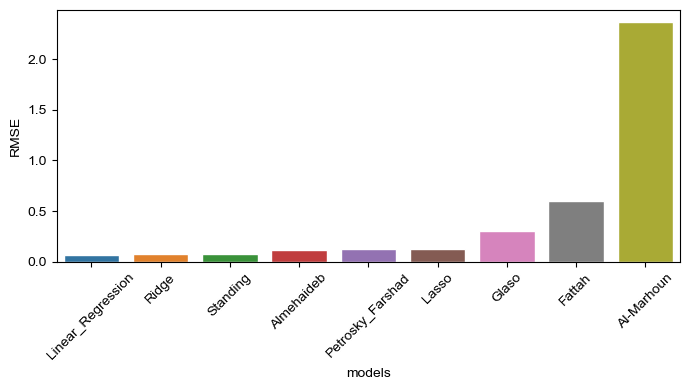

In [59]:
Bo = Bo_data.sort_values(by='RMSE').head(9)
Bo = Bo.reset_index()
Bo.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(7,4))
sns.set_style('dark')
sns.barplot(x='models', y='RMSE', data=Bo)
plt.xticks(rotation=45)
plt.tight_layout()

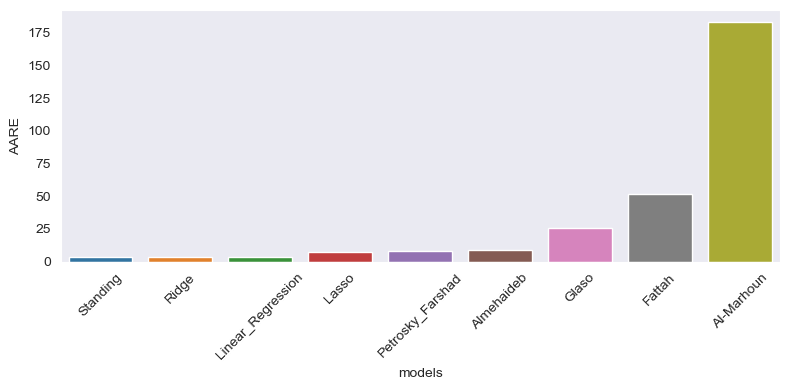

In [60]:
Bo = Bo_data.sort_values(by='MARE').head(9)
Bo = Bo.reset_index()
Bo.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x='models', y='AARE', data=Bo)
plt.xticks(rotation=45)
plt.tight_layout()

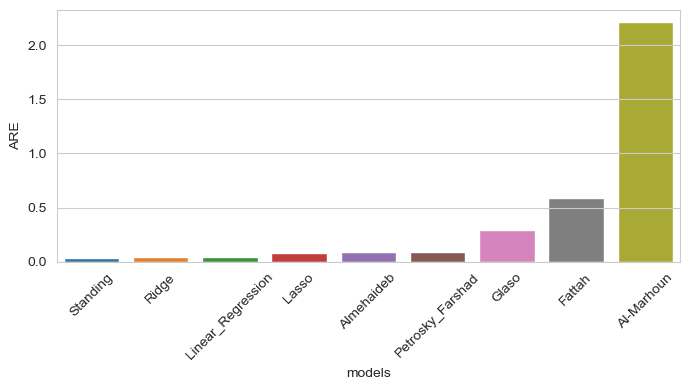

In [70]:
Bo = Bo_data.sort_values(by='MRE').head(9)
Bo = Bo.reset_index()
Bo.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(7,4))
sns.set_style('dark')
sns.barplot(x='models', y='ARE', data=Bo)
plt.xticks(rotation=45)
plt.tight_layout()

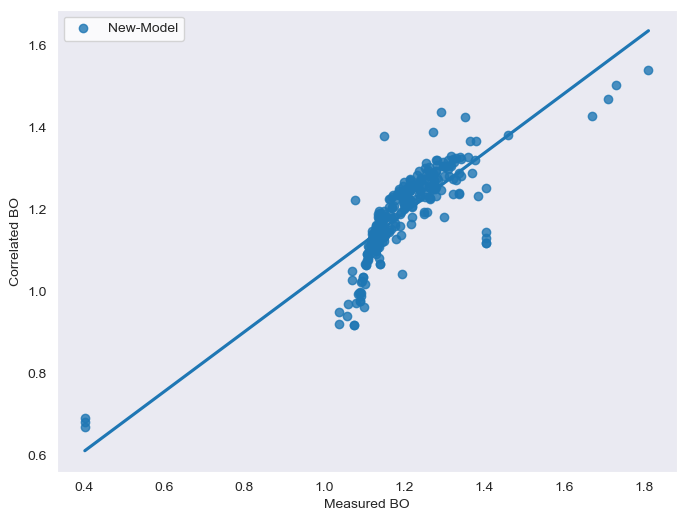

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid',{'axes.axisbelow':False})

sns.regplot(x='BO', y='Linear_Regr', data=model, fit_reg=True, ci=None, ax=ax, label='New-Model')
ax.set(ylabel='Correlated BO', xlabel='Measured BO')
ax.legend()
plt.show()